# OLA Ensemble Learning

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv('ola_driver_scaler.csv')

In [311]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## 1.  Exploratory Data Analysis

### Problem Statement -  

Depending upon various attributes like age, gender, joining date, leaving date, etc., we need to predict the probability of drivers leaving the company.

### Observations

#### 1. Dropping the unnecessary column

In [312]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [313]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


#### Reading the summary of dataframe

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


#### Observing the shape of the data

In [315]:
df.shape

(19104, 13)

#### Observing the number of columns

In [316]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

#### Missing value detection

In [317]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

#### Preparing the target attribute

<p>As we can see from the summary of the dataframe that there is no target attribute and we need to prepare it using the LastWorkingDate column.</p>
<p>Since the column is in date format and has a lot of missing values, therefore pre-processing and preparing target attribute from it</p>

In [318]:
df['LastWorkingDate'].value_counts()

LastWorkingDate
29/07/20    70
22/09/19    26
17/03/19    14
28/11/20    13
17/02/20    13
            ..
16/06/19     1
17/11/20     1
12/05/20     1
09/02/19     1
28/10/20     1
Name: count, Length: 493, dtype: int64

In [319]:
df['LastWorkingDate'].isna().sum()

17488

<p>Drivers who have the last working date in their column are the ones who left the company and drivers with missing values are still working there. Using the same information, let us prepare the target attribute with categories 0 (not left) and 1 (left)</p>

In [320]:
df[df['LastWorkingDate'].isna() == True]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [321]:
def func(x):
    if type(x) == str:
        return 1
    else:
        return 0

In [322]:
df['target'] = df['LastWorkingDate'].apply(func)

In [323]:
df['target'].value_counts()

target
0    17488
1     1616
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

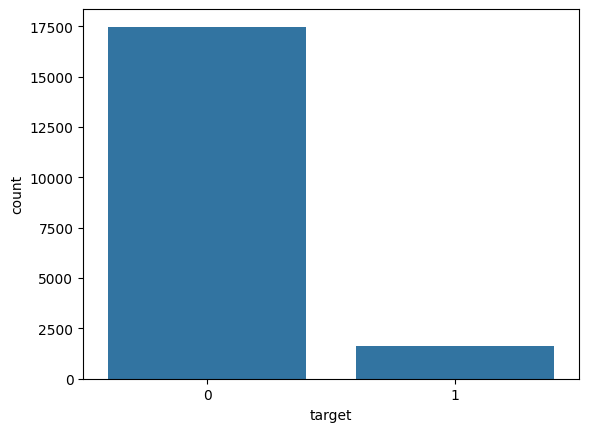

In [324]:
sns.countplot(x = df['target'], data=df)

This shows that the data is imbalanced 

#### Univariate Analysis

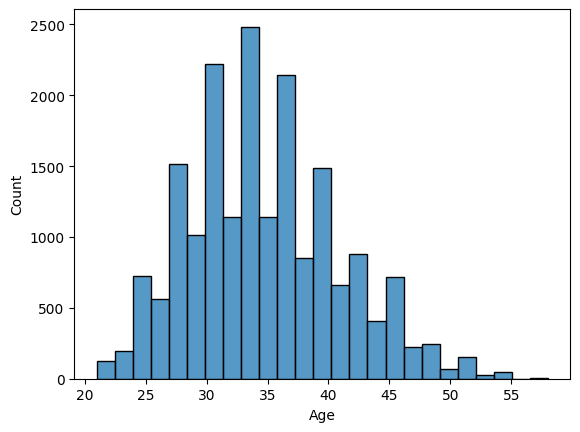

In [325]:
sns.histplot(df['Age'], bins=25)
plt.show()

In [326]:
df['Education_Level'].value_counts()

Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64

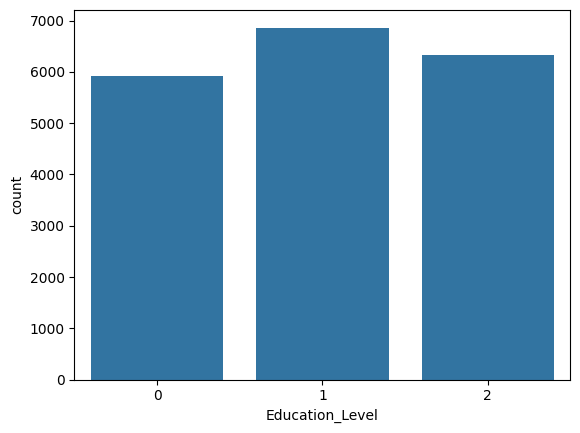

In [327]:
sns.countplot(x=df['Education_Level'])
plt.show()

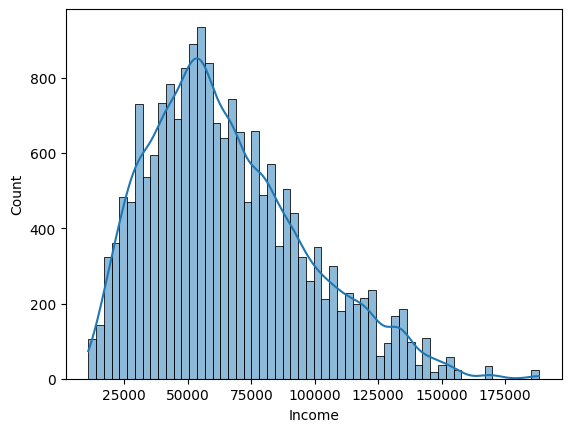

In [328]:
sns.histplot(x=df['Income'], kde=True)
plt.show()

In [329]:
df['Grade'].value_counts()

Grade
2    6627
1    5202
3    4826
4    2144
5     305
Name: count, dtype: int64

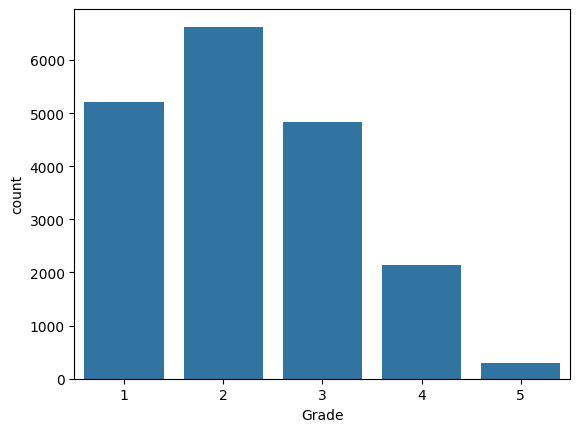

In [330]:
sns.countplot(x=df['Grade'])
plt.show()

In [331]:
df['Total Business Value'].nunique()

10181

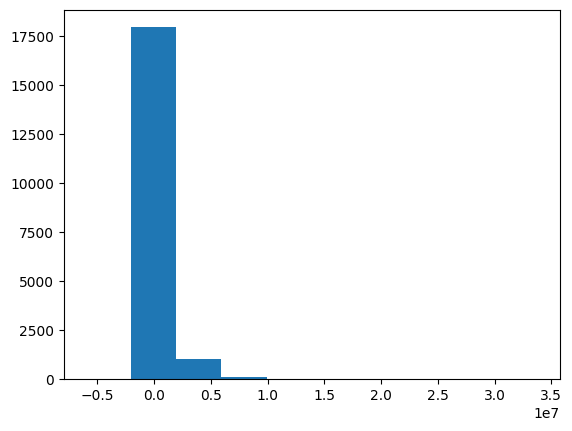

In [332]:
plt.hist(x=df['Total Business Value'])
plt.show()

In [333]:
df['Quarterly Rating'].value_counts()

Quarterly Rating
1    7679
2    5553
3    3895
4    1977
Name: count, dtype: int64

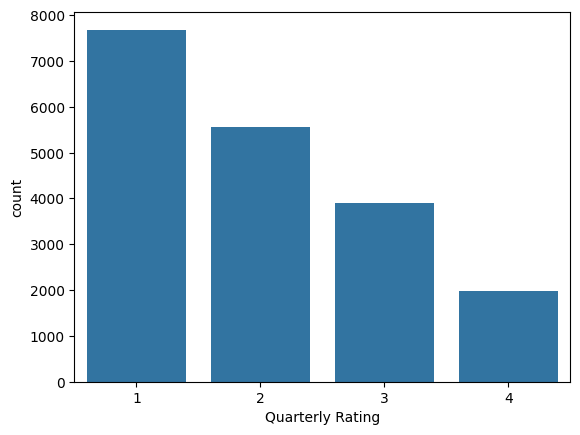

In [334]:
sns.countplot(x=df['Quarterly Rating'])
plt.show()

#### Bivariate Analysis

In [335]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'target'],
      dtype='object')

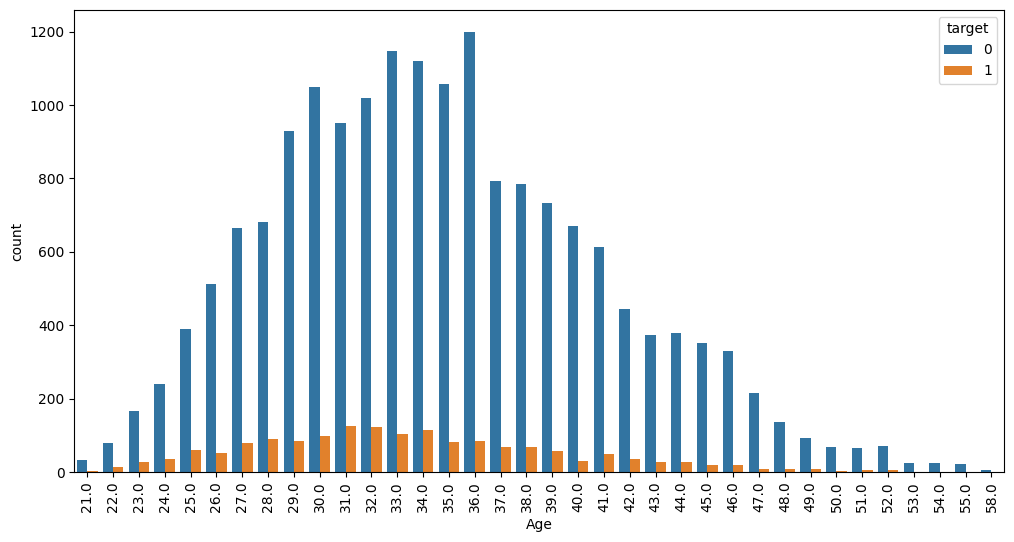

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Age'], data=df, hue=df['target'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

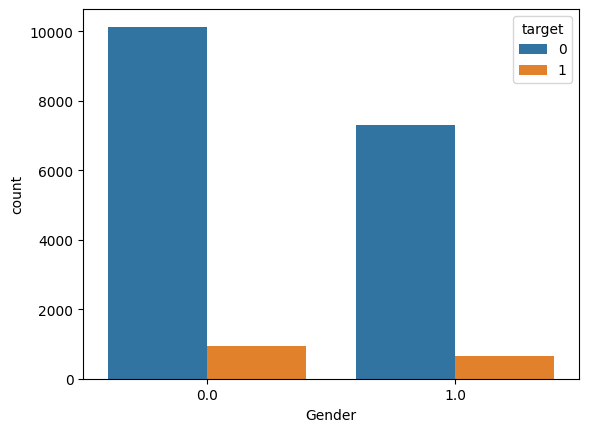

In [29]:
sns.countplot(x=df['Gender'], data=df, hue=df['target'])

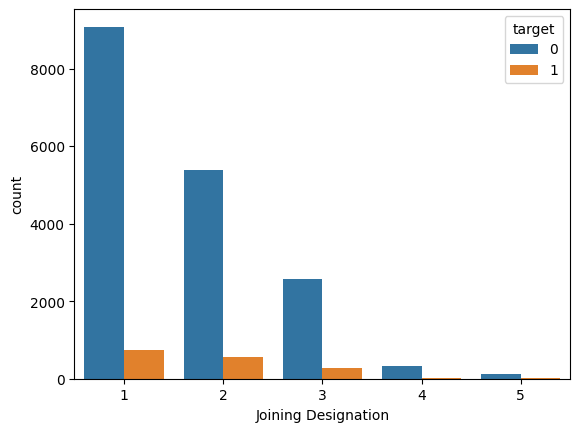

In [30]:
sns.countplot(x=df['Joining Designation'], data=df, hue=df['target'])
plt.show()

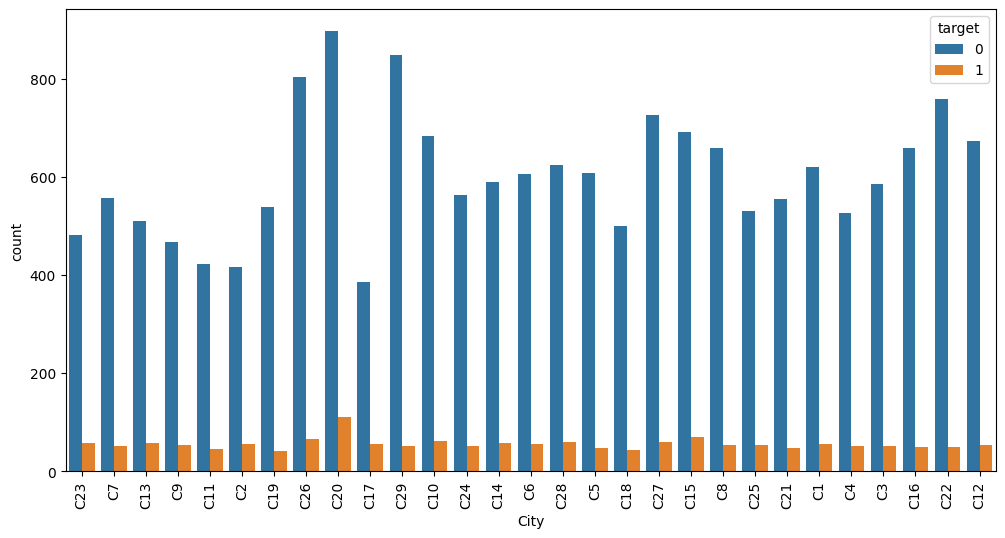

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['City'], data=df, hue=df['target'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Grade', ylabel='count'>

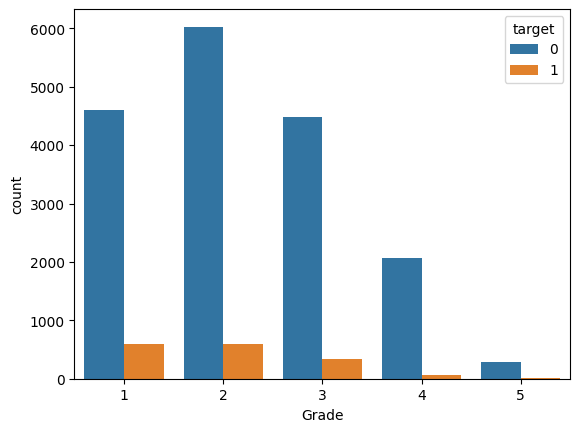

In [32]:
sns.countplot(x=df['Grade'], data=df, hue=df['target'])

<Axes: xlabel='target', ylabel='Income'>

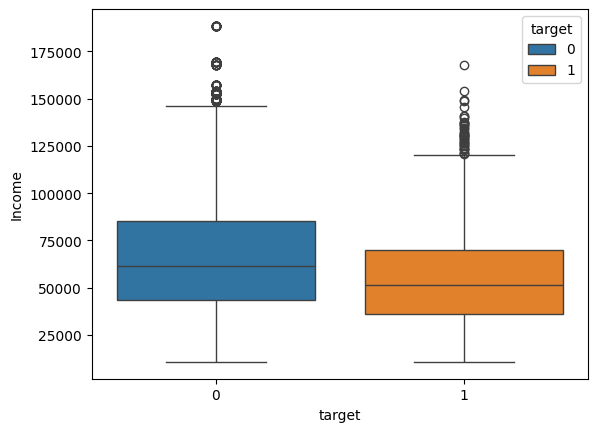

In [33]:
sns.boxplot(y=df['Income'], x=df['target'], data=df, hue=df['target'])

<Axes: xlabel='Quarterly Rating', ylabel='count'>

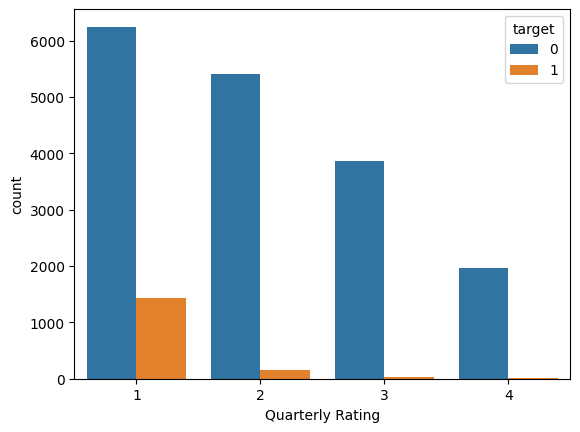

In [34]:
sns.countplot(x=df['Quarterly Rating'], data=df, hue=df['target'])

## 2. Data Preprocessing

#### Dealing with all the columns and converting categorical into numerical features

In [336]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0


##### 1. MMM-YY

Renaming the column

In [337]:
df.rename({'MMM-YY':'Monthly_Reporting'}, axis=1, inplace=True)

In [338]:
df.head(2)

,Monthly_Reporting,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0


In [339]:
df['Monthly_Reporting'].unique()

array(['01/01/19', '02/01/19', '03/01/19', '11/01/20', '12/01/20',
       '12/01/19', '01/01/20', '02/01/20', '03/01/20', '04/01/20',
       '08/01/20', '09/01/20', '10/01/20', '07/01/19', '08/01/19',
       '09/01/19', '10/01/19', '11/01/19', '04/01/19', '05/01/19',
       '06/01/19', '05/01/20', '06/01/20', '07/01/20'], dtype=object)

In [340]:
df['Monthly_Reporting'].nunique()

24

In [341]:
df['Monthly_Reporting'].value_counts()

Monthly_Reporting
01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
08/01/20     812
09/01/20     809
07/01/20     806
11/01/20     805
12/01/19     795
04/01/19     794
01/01/20     782
11/01/19     781
06/01/20     770
05/01/20     766
05/01/19     764
09/01/19     762
02/01/20     761
07/01/19     757
08/01/19     754
10/01/19     739
04/01/20     729
06/01/19     726
03/01/20     719
Name: count, dtype: int64

Check its dependency on target variable

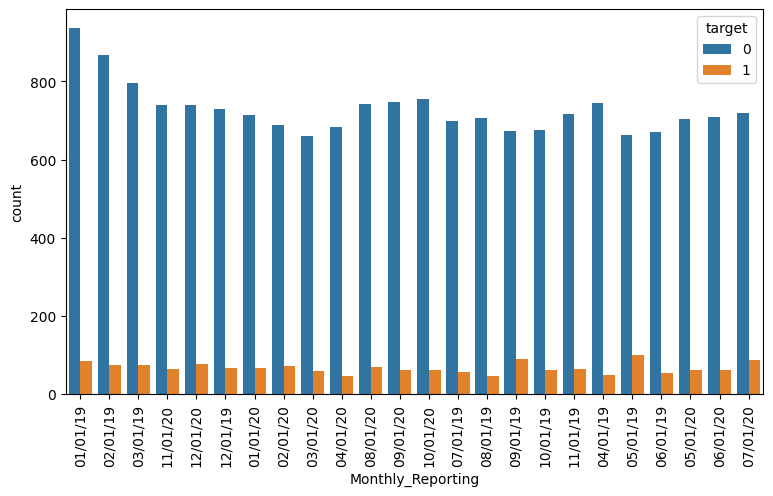

In [41]:
plt.figure(figsize=(9,5))
sns.countplot(x=df['Monthly_Reporting'], data=df, hue=df['target'])
plt.xticks(rotation=90)
plt.show()

As observed from the plot, it does not show any strong dependency of the target column on MMM-YY (Date) column, so we can remove it

In [342]:
df.drop('Monthly_Reporting', axis=1, inplace=True)

In [343]:
df.head(3)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1


##### 2. Driver_ID

In [344]:
df['Driver_ID'].nunique()

2381

In [345]:
df['Driver_ID'].value_counts()

Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64

As we can see that multiple Driver IDs are present in the dataset, therefore, we can group the entire dataset based on the unique Driver IDs.

In [346]:
df_group = df.groupby(df['Driver_ID']).aggregate({'Age':'max', 'Gender':'last', 'City':'last', 'Education_Level':'last',
                                                  'Income':'sum','Dateofjoining':'first', 'LastWorkingDate':'last', 
                                                  'Joining Designation': 'last','Grade':'last','Total Business Value':'sum',
                                                  'Quarterly Rating':'max', 'target': 'last'})

In [347]:
df_group

,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
Driver_ID,,,,,,,,,,,,
1,28.0,0.0,C23,2,172161,24/12/18,03/11/19,1,1,1715580,2,1
2,31.0,0.0,C7,2,134032,11/06/20,None,2,2,0,1,0
4,43.0,0.0,C13,2,328015,12/07/19,27/04/20,2,2,350000,1,1
5,29.0,0.0,C9,0,139104,01/09/19,03/07/19,1,1,120360,1,1
6,31.0,1.0,C11,1,393640,31/07/20,None,3,3,1265000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0,1987560,15/10/15,None,2,3,21748820,4,0
2785,34.0,1.0,C9,0,36315,28/08/20,28/10/20,1,1,0,1,1
2786,45.0,0.0,C19,0,318330,31/07/18,22/09/19,2,2,2815090,2,1


In [348]:
df_group.reset_index(inplace=True)

In [349]:
df_group.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,1,28.0,0.0,C23,2,172161,24/12/18,03/11/19,1,1,1715580,2,1
1,2,31.0,0.0,C7,2,134032,11/06/20,None,2,2,0,1,0
2,4,43.0,0.0,C13,2,328015,12/07/19,27/04/20,2,2,350000,1,1
3,5,29.0,0.0,C9,0,139104,01/09/19,03/07/19,1,1,120360,1,1
4,6,31.0,1.0,C11,1,393640,31/07/20,None,3,3,1265000,2,0


###### Check its dependency on target variable

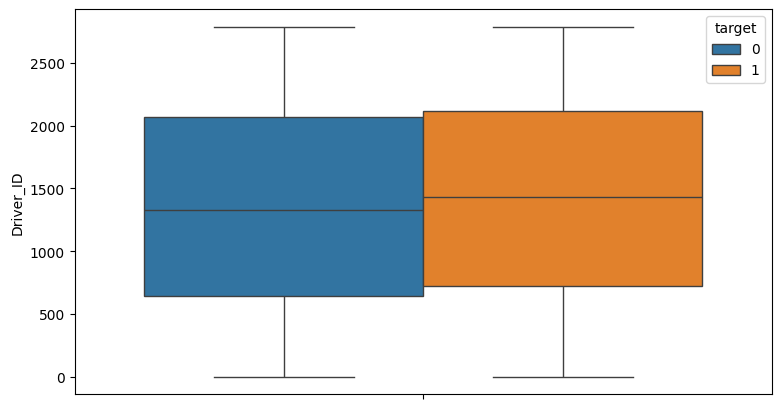

In [50]:
plt.figure(figsize=(9,5))
sns.boxplot(y=df_group['Driver_ID'], data=df_group, hue=df_group['target'])
plt.xticks(rotation=90)
plt.show()

##### 3. City

In [350]:
df_group['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [351]:
df_group['City'].value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

In [352]:
df_group['City'] = df_group['City'].apply(lambda n:int(n[1:]))

In [353]:
df_group.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,1,28.0,0.0,23,2,172161,24/12/18,03/11/19,1,1,1715580,2,1
1,2,31.0,0.0,7,2,134032,11/06/20,None,2,2,0,1,0
2,4,43.0,0.0,13,2,328015,12/07/19,27/04/20,2,2,350000,1,1
3,5,29.0,0.0,9,0,139104,01/09/19,03/07/19,1,1,120360,1,1
4,6,31.0,1.0,11,1,393640,31/07/20,None,3,3,1265000,2,0


##### 4. Date of Joining

In [354]:
df_group['joining_month'] = pd.to_datetime(df_group['Dateofjoining']).dt.month

In [355]:
df_group['joining_year'] = pd.to_datetime(df_group['Dateofjoining']).dt.year

In [356]:
df_group.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,joining_month,joining_year
0,1,28.0,0.0,23,2,172161,24/12/18,03/11/19,1,1,1715580,2,1,12,2018
1,2,31.0,0.0,7,2,134032,11/06/20,None,2,2,0,1,0,11,2020
2,4,43.0,0.0,13,2,328015,12/07/19,27/04/20,2,2,350000,1,1,12,2019
3,5,29.0,0.0,9,0,139104,01/09/19,03/07/19,1,1,120360,1,1,1,2019
4,6,31.0,1.0,11,1,393640,31/07/20,None,3,3,1265000,2,0,7,2020


##### 5. Last Working Date

In [359]:
df_group.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,joining_month,joining_year
0,1,28.0,0.0,23,2,172161,24/12/18,03/11/19,1,1,1715580,2,1,12,2018
1,2,31.0,0.0,7,2,134032,11/06/20,None,2,2,0,1,0,11,2020
2,4,43.0,0.0,13,2,328015,12/07/19,27/04/20,2,2,350000,1,1,12,2019
3,5,29.0,0.0,9,0,139104,01/09/19,03/07/19,1,1,120360,1,1,1,2019
4,6,31.0,1.0,11,1,393640,31/07/20,None,3,3,1265000,2,0,7,2020


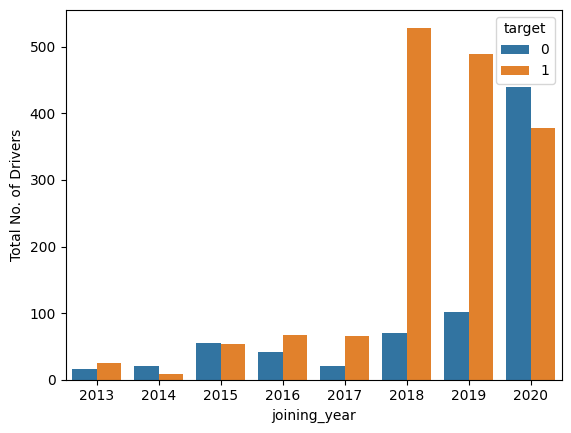

In [363]:
sns.countplot(x=df_group['joining_year'], data=df_group, hue=df_group['target'])
plt.ylabel('Total No. of Drivers')
plt.show()

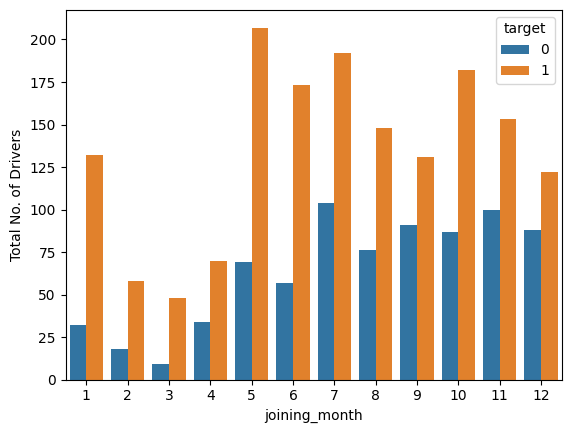

In [364]:
sns.countplot(x=df_group['joining_month'], data=df_group, hue=df_group['target'])
plt.ylabel('Total No. of Drivers')
plt.show()

The above plots shows that - 
1. Employee Attrition is higher in the year 2018, 2019, 2020.
2. Companies started hiring maximum drivers in 2020.
3. Most of the drivers leaving the company are in between 0 to 2 years of experience.
4. Employee Attrition is not month specific.

Some irrelevant columns can be removed now-
1. Driver ID - This is just an Id that does not make any impact on target column.
2. Joining Date - As we have converted it into month and year
3. Last Working Date - This has also been converted into month and year

In [367]:
df_group.drop(['Driver_ID','Dateofjoining','LastWorkingDate'], axis=1, inplace=True)

In [368]:
df_group.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,joining_month,joining_year
0,28.0,0.0,23,2,172161,1,1,1715580,2,1,12,2018
1,31.0,0.0,7,2,134032,2,2,0,1,0,11,2020
2,43.0,0.0,13,2,328015,2,2,350000,1,1,12,2019
3,29.0,0.0,9,0,139104,1,1,120360,1,1,1,2019
4,31.0,1.0,11,1,393640,3,3,1265000,2,0,7,2020


Checking the data type if there is any categorical feature left -

In [369]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   int64  
 3   Education_Level       2381 non-null   int64  
 4   Income                2381 non-null   int64  
 5   Joining Designation   2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   Quarterly Rating      2381 non-null   int64  
 9   target                2381 non-null   int64  
 10  joining_month         2381 non-null   int32  
 11  joining_year          2381 non-null   int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 204.7 KB


#### Handling Missing Values

In [370]:
df_group.isna().sum()

Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
target                  0
joining_month           0
joining_year            0
dtype: int64

### Checking and Treating Outliers

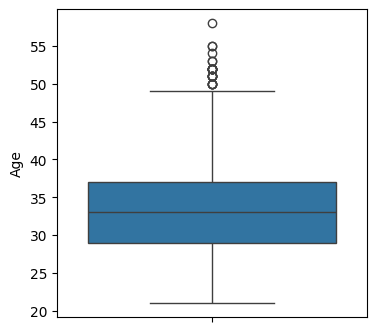

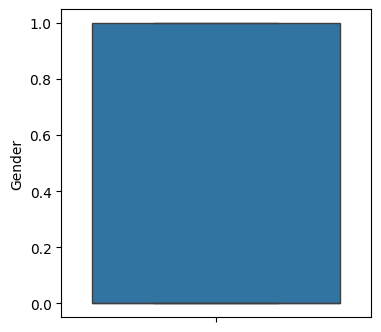

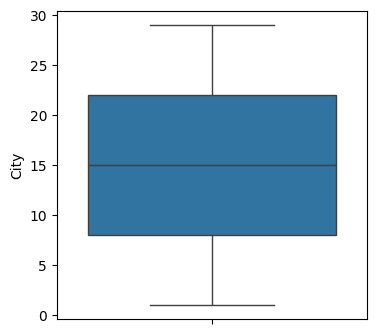

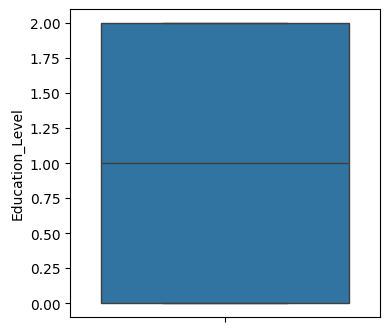

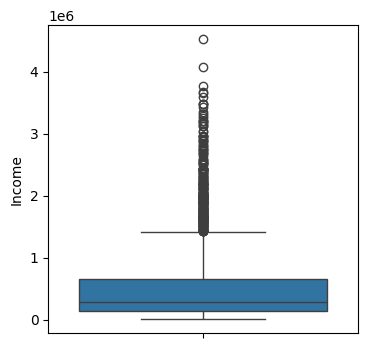

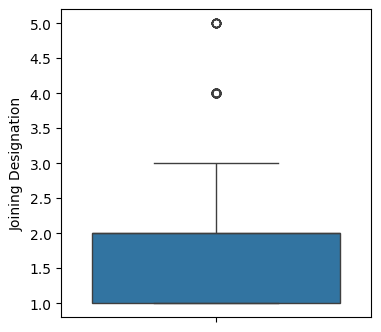

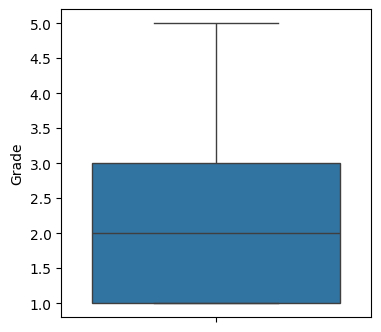

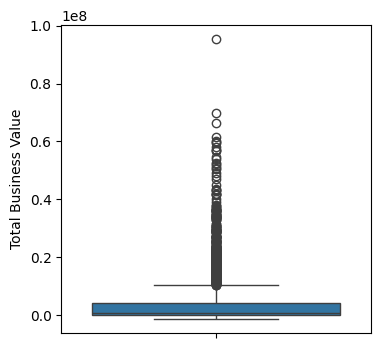

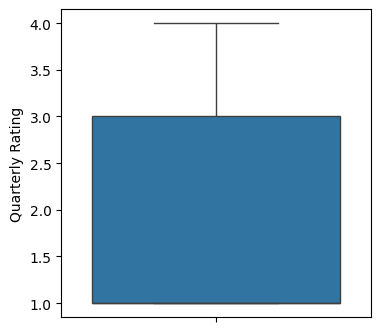

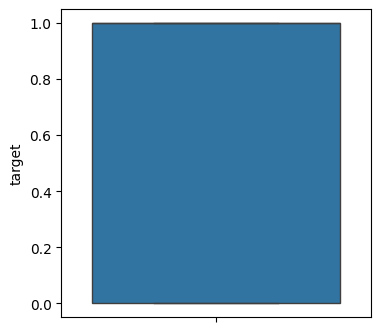

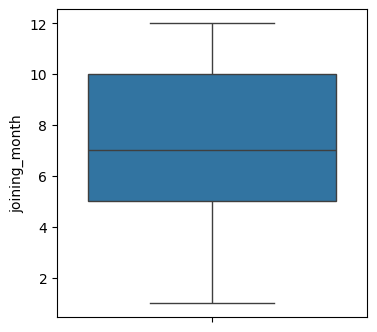

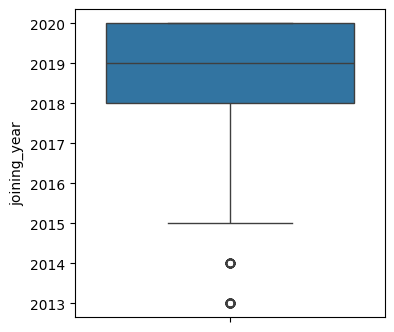

In [373]:
for c in df_group.columns:
    plt.figure(figsize = (4,4))
    sns.boxplot(y=df_group[c], data=df_group)
    plt.show()

In [490]:
for c in df_group.columns:
    
    Q1 = np.percentile(df_group[c].values, 25)
    Q3 = np.percentile(df_group[c].values, 75)
    
    IQR = Q3 - Q1
    
    upper_whisker = Q3 + 1.5*IQR
    lower_whisker = Q1 - 1.5*IQR
    
    Median = df_group[c].median()
    
    indices = df_group[(df_group[c] > upper_whisker) | (df_group[c] < lower_whisker)][c].index
    
    df_group.loc[indices, c] = Median

All the outliers are treated using medain of the required column

### Splitting the Dataset into Training, Validation and Test Data 

In [375]:
X = df_group.drop('target', axis=1)

In [376]:
X.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining_month,joining_year
0,28.0,0.0,23,2,172161,1,1,1715580,2,12,2018
1,31.0,0.0,7,2,134032,2,2,0,1,11,2020
2,43.0,0.0,13,2,328015,2,2,350000,1,12,2019
3,29.0,0.0,9,0,139104,1,1,120360,1,1,2019
4,31.0,1.0,11,1,393640,3,3,1265000,2,7,2020


In [377]:
y = df_group['target']

In [378]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int64

In [379]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [380]:
X_train.shape, y_train.shape

((1338, 11), (1338,))

In [381]:
X_val.shape, y_val.shape

((447, 11), (447,))

In [382]:
X_test.shape, y_test.shape

((596, 11), (596,))

### Treating Imbalance Dataset using SMOTE

In [383]:
y_train.value_counts()

target
1    890
0    448
Name: count, dtype: int64

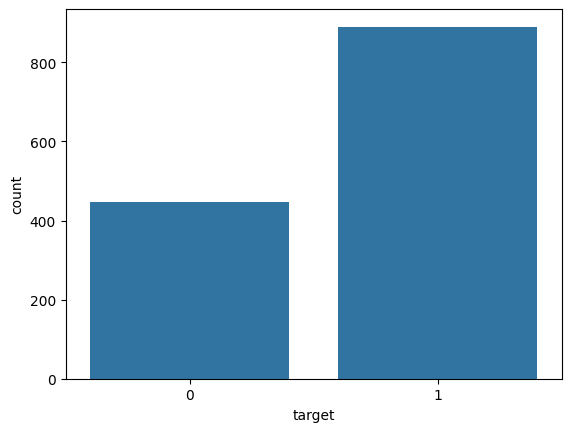

In [384]:
sns.countplot(x = y_train)
plt.show()

In [385]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [386]:
y_train_sm.value_counts()

target
1    890
0    890
Name: count, dtype: int64

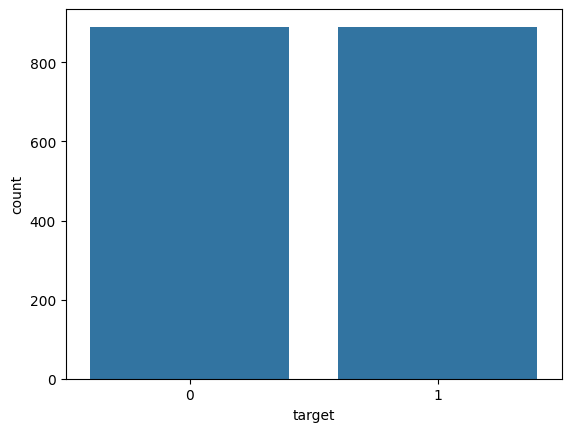

In [387]:
sns.countplot(x = y_train_sm)
plt.show()

### Scaling the Data

In [388]:
from sklearn.preprocessing import StandardScaler

In [389]:
scaler = StandardScaler()

In [390]:
X_train_scaled = scaler.fit_transform(X_train_sm)

In [391]:
X_train_scaled

array([[ 2.40531311, -0.85352955, -1.39764177, ...,  0.81655282,
         0.82015971, -0.56599245],
       [ 0.60144872,  1.27965048,  1.67949353, ...,  0.81655282,
         0.82015971,  0.1726194 ],
       [ 0.24067585, -0.85352955,  1.18715188, ..., -0.91479206,
         0.15823077,  0.91123125],
       ...,
       [-1.29143097,  1.27965048, -1.27455636, ..., -0.91479206,
         0.48919524,  0.91123125],
       [-0.87367901,  0.50214806,  1.06406647, ..., -0.91479206,
        -0.50369817,  0.91123125],
       [-1.00486341, -0.85352955,  0.81789565, ...,  1.68222526,
         0.48919524, -0.56599245]])

In [392]:
X_val_scaled = scaler.transform(X_val)

In [393]:
X_test_scaled = scaler.transform(X_test)

In [394]:
X_train_sm[X_train_sm.columns] = X_train_scaled

In [395]:
X_train_sm.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining_month,joining_year
0,2.405313,-0.85353,-1.397642,0.069890,1.179986,-1.017904,-0.113557,-0.287603,0.816553,0.820160,-0.565992
1,0.601449,1.27965,1.679494,1.339313,-0.269934,-1.017904,2.083528,-0.287603,0.816553,0.820160,0.172619
2,0.240676,-0.85353,1.187152,0.069890,0.002767,0.310446,-0.113557,-0.673832,-0.914792,0.158231,0.911231
3,-0.841643,-0.85353,0.571725,1.339313,1.325488,1.638795,0.984986,0.753336,0.816553,-0.172734,0.911231
4,1.683767,-0.85353,0.940981,1.339313,0.233077,0.310446,-0.113557,0.290389,-0.049120,-0.834663,0.911231


In [396]:
y_train_sm.head()

0    1
1    0
2    1
3    0
4    0
Name: target, dtype: int64

## 3. Model Building

### 1. Bagging Algorithm

Ignoring warnings

In [397]:
import warnings

warnings.filterwarnings(action='ignore')

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

kfold = KFold(n_splits=10)

cv_acc_results = cross_validate(rf_classifier, X_train_sm, y_train_sm, cv=kfold, scoring='accuracy', return_train_score=True)

In [410]:
cv_acc_results

{'fit_time': array([0.90077209, 0.75045991, 0.87896276, 0.76190829, 0.71436095,
        0.73259139, 0.63605452, 0.6907444 , 0.65190578, 0.78305745]),
 'score_time': array([0.03055739, 0.02384067, 0.02399349, 0.01733565, 0.0080111 ,
        0.02395296, 0.00799489, 0.01599193, 0.00799656, 0.01598954]),
 'test_score': array([0.87640449, 0.90449438, 0.94382022, 0.89325843, 0.89325843,
        0.87078652, 0.85955056, 0.90449438, 0.95505618, 0.92696629]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [418]:
print(f"Training Accuracy: {round(cv_acc_results['train_score'].mean()*100,2)}")

Training Accuracy: 100.0


In [420]:
print(f"Validation Accuracy: {round(cv_acc_results['test_score'].mean()*100,2)}")

Validation Accuracy: 90.28


On training the data using random forest classifier and checking the training accuracy score, we found that it is overfitting the data, resulting in 100% accuracy. Therefore we will do hyperparameter tuning.

### Hyperparameter Tuning

#### Grid Search CV

In [472]:
params = {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [3,4,5],
    'criterion' : ['gini'],
    'max_features' : [4,5,6],
    'bootstrap' : [False]    
    }

In [473]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)

In [474]:
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [3, 4, 5], 'max_features': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [475]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'n_estimators': 300}

In [476]:
grid.best_score_

0.8938116408605447

On tuning the hyperparameters, the algorithm gives 89% best validation score. Therefore, using best estimators again with random forest classifier

In [477]:
rf_classifier_2 = RandomForestClassifier(**grid.best_params_)

In [478]:
rf_classifier_2.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=5,
                       n_estimators=300)

In [482]:
print(f"Training Accuracy Score: {round(rf_classifier_2.score(X_train_sm, y_train_sm)*100,2)}%")

Training Accuracy Score: 90.45%


In [483]:
print(f"Validation Accuracy Score: {round(rf_classifier_2.score(X_val_scaled, y_val)*100,2)}%")

Validation Accuracy Score: 86.35%


In [484]:
print(f"Test Accuracy Score: {round(rf_classifier_2.score(X_test_scaled, y_test)*100,2)}%")

Test Accuracy Score: 87.25%


The above algorithm performs well on training, validation and test data, resulting in high accuracy score.

### 2. Boosting Algorithm

In [426]:
from sklearn.ensemble import GradientBoostingClassifier

In [427]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [428]:
gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [438]:
print(f"Training Accuracy: {round(gbc.score(X_train_sm, y_train_sm)*100,2)}%")

Training Accuracy: 91.97%


In [439]:
print(f"Validation Accuracy: {round(gbc.score(X_val_scaled, y_val)*100,2)}%")

Validation Accuracy: 88.81%


In [440]:
print(f"Test Accuracy: {round(gbc.score(X_test_scaled, y_test)*100,2)}%")

Test Accuracy: 87.58%


Gradient Boosting Classifier performs well too in all types of data. Therefore, making predictions on unseen (test) data :

In [445]:
test_pred = gbc.predict(X_test_scaled)

## 4. Results Evaluation

### 1. AUC ROC Curve

In [492]:
from sklearn.metrics import roc_curve, roc_auc_score

In [493]:
auc = roc_auc_score(y_test, test_pred)

In [494]:
print(f"AUC ROC Score: {round(auc,2)}")

AUC ROC Score: 0.88


In [451]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

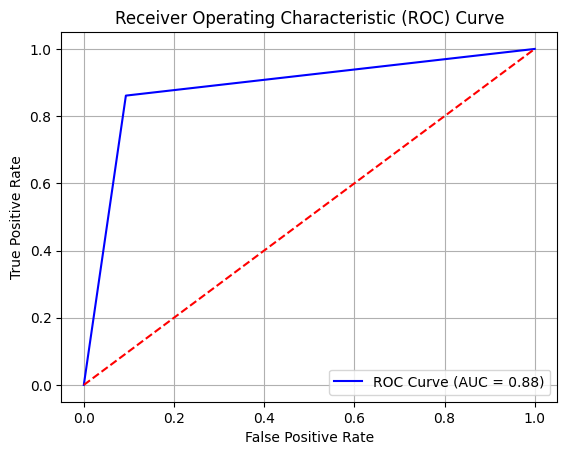

In [496]:
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {round(auc,2)})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The above curve shows:<br>
1. High accuracy in predicting the positive class.
2. Good balance between true positive rate (sensitivity) and false positive rate (specificity).

### 2. Classification Report

In [455]:
from sklearn.metrics import classification_report

In [460]:
class_report = classification_report(y_test, test_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       193
           1       0.95      0.86      0.90       403

    accuracy                           0.88       596
   macro avg       0.85      0.88      0.86       596
weighted avg       0.89      0.88      0.88       596



Precision:
1. For class 0: 76% of the predicted positive are correctly classified.
2. For class 1: 95% of the predicted positive are correctly classified.

Recall:
1. For class 0: 91% of the actual positives are correctly classified.
2. For class 1: 86% of the actual positives are correctly classified.

F1 Score:
1. For class 0: 0.83
2. For class 1: 0.90

The above results shows a strong performance of the boosting algorithm.

### 3. Confusion Matrix Display

In [464]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [488]:
conf_mat = confusion_matrix(y_test, test_pred)

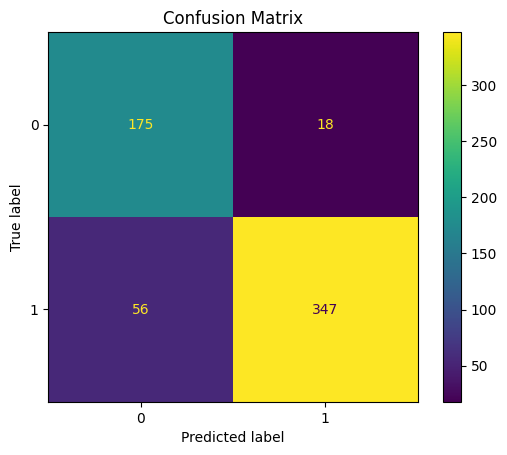

In [489]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

The above confusion matrix shows:
1. The model exhibits high accuracy.
2. The model is correctly identifying negative cases (TN = 175, FP = 18).
3. The model is correctly identifying negative case (TP = 347, FN = 56).

Thus, from the above solved case study it can be concluded that -
1. Based on the demographics, historical data, etc., the model is able to predict whether a driver can leave the company or not.
2. The model is performing well in predicting class 1 (driver will leave the company).